In [1]:
import mido
mid = mido.MidiFile('IMSLP221460-WIMA.2591-BWV_1079_1-Part.mid', clip=True)
#mid.tracks
print(mid.tracks)

[MidiTrack([
  MetaMessage('set_tempo', tempo=500000, time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=0, notated_32nd_notes_per_beat=8, time=0),
  MetaMessage('end_of_track', time=0)]), MidiTrack([
  MetaMessage('track_name', name='Violine', time=0),
  MetaMessage('device_name', name='MIDI: Out To MIDI Yoke:  1', time=0),
  Message('program_change', channel=0, program=40, time=0),
  Message('aftertouch', channel=0, value=97, time=0),
  Message('control_change', channel=0, control=7, value=97, time=0),
  Message('pitchwheel', channel=0, pitch=0, time=0),
  Message('control_change', channel=0, control=11, value=63, time=0),
  Message('note_on', channel=0, note=72, velocity=127, time=0),
  Message('note_off', channel=0, note=72, velocity=64, time=730),
  Message('note_on', channel=0, note=75, velocity=127, time=38),
  Message('note_off', channel=0, note=75, velocity=64, time=730),
  Message('note_on', channel=0, note=79, velocity=127, time=38),
  Mess

In [2]:
import numpy as np
notes = np.zeros(shape=(372,1))
print(notes)
bpm = 0
print(type(mid.tracks[0][0]))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [3]:
tempi = []
for track in mid.tracks:
    for msg in track:
        if msg.type == 'set_tempo':
            tempi.append(msg.tempo)
print(tempi)

[500000]


In [4]:
tempo = tempi[0]
ticks_per_beat = mid.ticks_per_beat
bpm = 60000000/tempo
dt = 60 / (bpm * ticks_per_beat)
print(dt)
print(ticks_per_beat)

0.0013020833333333333
384


[[  0.        ]
 [ 72.        ]
 [  2.        ]
 [ 75.        ]
 [  4.        ]
 [ 79.        ]
 [  6.        ]
 [ 80.        ]
 [  8.        ]
 [ 71.        ]
 [ 11.        ]
 [ 79.        ]
 [ 12.        ]
 [ 78.        ]
 [ 14.        ]
 [ 77.        ]
 [ 16.        ]
 [ 76.        ]
 [ 18.        ]
 [ 75.        ]
 [ 21.        ]
 [ 74.        ]
 [ 22.        ]
 [ 73.        ]
 [ 23.        ]
 [ 72.        ]
 [ 24.        ]
 [ 71.        ]
 [ 25.        ]
 [ 69.        ]
 [ 25.5       ]
 [ 67.        ]
 [ 26.        ]
 [ 72.        ]
 [ 27.        ]
 [ 77.        ]
 [ 28.        ]
 [ 75.        ]
 [ 30.        ]
 [ 74.        ]
 [ 30.25      ]
 [ 75.        ]
 [ 30.375     ]
 [ 74.        ]
 [ 30.5       ]
 [ 75.        ]
 [ 30.625     ]
 [ 74.        ]
 [ 30.75      ]
 [ 75.        ]
 [ 30.875     ]
 [ 74.        ]
 [ 31.        ]
 [ 75.        ]
 [ 31.125     ]
 [ 74.        ]
 [ 31.25      ]
 [ 75.        ]
 [ 31.375     ]
 [ 74.        ]
 [ 31.5       ]
 [ 75.        ]
 [ 31.62

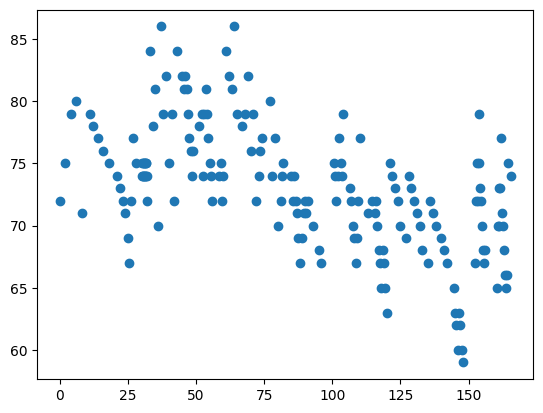

In [5]:
note = 0
beats = []
tones = []
for track in mid.tracks:
    beat = 0
    for msg in track:
        beat += msg.time / ticks_per_beat
        if((msg.type == 'note_on') and (note<371)):
            notes[note][0] = beat
            beats.append(beat)
            notes[note+1][0] = msg.note
            tones.append(msg.note)
            
            note += 2
print(notes)
import matplotlib.pyplot as plt
plt.scatter(beats, tones)
plt.show()

47


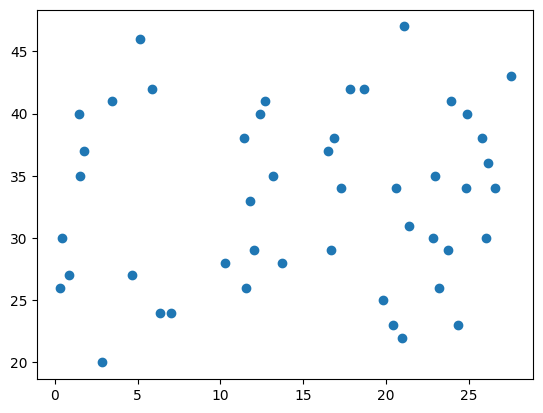

In [6]:
# ::::::::::::::: Random MIDI-Generator::::::::::::::
import random

tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
rseq = np.zeros(shape=(256,1))
duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
# maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten

rmoments = []
rtones = []
for rnote in range(0, n_notes):
    rmoments.append(random.uniform(0, duration))
    rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
rmoments.sort()

print(len(rtones))
plt.scatter(rmoments, rtones)
plt.show()

In [7]:
rmid = mido.MidiFile()
track = mido.MidiTrack()
rmid.tracks.append(track)
tpb = 1680
rmid.ticks_per_beat = tpb

rest = 0
rnote = 0
for rnote in range(0, n_notes-1):
    if((rmoments[rnote+1]-rmoments[rnote])*tpb <= 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=int(round((rmoments[rnote+1]-rmoments[rnote])*tpb))))
        rest = 0

    elif((rmoments[rnote+1]-rmoments[rnote])*tpb > 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=840))
        rest = int(round((rmoments[rnote+1]-rmoments[rnote])*tpb-840))
        
track.append(mido.Message('note_on', channel=0, note=rtones[n_notes-1], velocity=127, time=rest))
track.append(mido.Message('note_off', channel=0, note=rtones[n_notes-1], velocity=96, time=840))    

track.append(mido.MetaMessage('end_of_track'))

rmid.save('random.mid')

In [8]:
def mid2vec(mid):
    # Bepaal tijdseenheden
    tempi = []
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                tempi.append(msg.tempo)
    tempo = 500000
    if(len(tempi)>0):
        tempo = tempi[0]
    ticks_per_beat = mid.ticks_per_beat
    bpm = 60000000/tempo
    dt = 60 / (bpm * ticks_per_beat)

    # Maak vector met de noten
    notes = np.zeros(shape=(372,1))
    note = 0
    beats = []
    tones = []
    for track in mid.tracks:
        beat = 0
        for msg in track:
            beat += msg.time / ticks_per_beat
            if((msg.type == 'note_on') and (note<371)):
                notes[note][0] = beat
                beats.append(beat)
                notes[note+1][0] = msg.note
                tones.append(msg.note)
                note += 2

    return(notes)
print(mid2vec(mid))

[[  0.        ]
 [ 72.        ]
 [  2.        ]
 [ 75.        ]
 [  4.        ]
 [ 79.        ]
 [  6.        ]
 [ 80.        ]
 [  8.        ]
 [ 71.        ]
 [ 11.        ]
 [ 79.        ]
 [ 12.        ]
 [ 78.        ]
 [ 14.        ]
 [ 77.        ]
 [ 16.        ]
 [ 76.        ]
 [ 18.        ]
 [ 75.        ]
 [ 21.        ]
 [ 74.        ]
 [ 22.        ]
 [ 73.        ]
 [ 23.        ]
 [ 72.        ]
 [ 24.        ]
 [ 71.        ]
 [ 25.        ]
 [ 69.        ]
 [ 25.5       ]
 [ 67.        ]
 [ 26.        ]
 [ 72.        ]
 [ 27.        ]
 [ 77.        ]
 [ 28.        ]
 [ 75.        ]
 [ 30.        ]
 [ 74.        ]
 [ 30.25      ]
 [ 75.        ]
 [ 30.375     ]
 [ 74.        ]
 [ 30.5       ]
 [ 75.        ]
 [ 30.625     ]
 [ 74.        ]
 [ 30.75      ]
 [ 75.        ]
 [ 30.875     ]
 [ 74.        ]
 [ 31.        ]
 [ 75.        ]
 [ 31.125     ]
 [ 74.        ]
 [ 31.25      ]
 [ 75.        ]
 [ 31.375     ]
 [ 74.        ]
 [ 31.5       ]
 [ 75.        ]
 [ 31.62

In [9]:
def randombass():
    tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
    rseq = np.zeros(shape=(256,1))
    duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
    n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
    # maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten
    
    rmoments = []
    rtones = []
    for rnote in range(0, n_notes):
        rmoments.append(random.uniform(0, duration))
        rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
    rmoments.sort()

    rnote = 0
    rnotes = np.zeros(shape=(372,1))
    halfpos = 0
    while(rnote < 371 and halfpos < n_notes):
        rnotes[rnote] = rmoments[halfpos]
        rnotes[rnote+1] = rtones[halfpos]
        halfpos += 1
        rnote += 2
    return(rnotes)

In [10]:
# Eerste poging
def midi2imgs(mid):
    print("activatie")
    tones = np.zeros(128)
    img = np.zeros(shape=(384, 128))
    imgs = [img, img, img, img]
    
    # Bepaal tijdseenheden
    tempi = []
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                tempi.append(msg.tempo)
    tempo = 500000
    if(len(tempi)>0):
        tempo = tempi[0]
    ticks_per_beat = mid.ticks_per_beat
    if(ticks_per_beat % 24 != 0):
        print("TPP ERROR!")
    ticks_per_pixel = int(round(ticks_per_beat / 24))
    bpm = 60000000/tempo
    dt = 60 / (bpm * ticks_per_beat)
    print("Tempo bepaald")

    for track in mid.tracks:
        imgn = 0
        row = 0
        img = np.zeros(shape=(384, 128))
        
        for msg in track:
            # Trek noten door tot deze note event
            for pixel in range (int(row), int(row + msg.time / ticks_per_pixel)):
                img[pixel] = tones
            print("doorgetrokken")
            row += msg.time / ticks_per_pixel

            # Pas nootwaarden aan
            if(imgn < 4):
                if(row < 384):
                    if(msg.type == 'note_on'):
                        tones[msg.note] = msg.velocity
                    elif(msg.type == 'note_off'):
                        tones[msg.note] = 0
                        img[int(row)-1][msg.note] = 0 # Witte separatorpixel
                    img[int(row)] = tones
                    print("rij aangepast")
                    #print(tones)
                
                elif(row >= 384):
                    imgs[imgn] += img #optellen van alle kanalen op één img
                    img = np.zeros(shape=(384, 128))
                    row -= 384
                    imgn += 1           
                    print("door naar volgende img")
    return(imgs)

In [11]:
def mid2img(mid):
    tones = np.zeros(128)
    img = np.zeros(shape=(384*4, 128))# Oplossing overloop probleem. Maak de image 4x zo lang en split vervolgens
    imgs = [img, img, img, img] # Idee was eerst om 4 images van 4 maten te maken. Één image van 16 maten in 4 splitsen bleek beter
    
    # Bepaal tijdseenheden
    tempi = []
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                tempi.append(msg.tempo)
    tempo = 500000
    if(len(tempi)>0):
        tempo = tempi[0]
    ticks_per_beat = mid.ticks_per_beat
    if(ticks_per_beat % 24 != 0):
        print("TPP ERROR!")
    ticks_per_pixel = int(round(ticks_per_beat / 24))
    bpm = 60000000/tempo
    dt = 60 / (bpm * ticks_per_beat)

    for track in mid.tracks:
        row = 0
        imgn = 0
        tones = np.zeros(128)
        img = np.zeros(shape=(384*4, 128))
        
        for msg in track:
            
            if(imgn < 1):# Voor nu is meerdere 4maten uit één midi nog glitchy. Problemen zijn niet de eerste 4maat duplicaten en noten die door meer dan 2 4maten lopen
            # Dit probleem is inmiddels verholpen door de originele image groter te maken en vervolgens aan het eind op te delen.

                # Noten worden doorgetrokken naar huidige note event
                if(row + msg.time / ticks_per_pixel < 384*4):
                    for pixel in range(int(row), int(row + msg.time / ticks_per_pixel)):
                        img[pixel] = tones
                    row += msg.time / ticks_per_pixel
                    
                elif(row + msg.time / ticks_per_pixel >= 384*4): # Als noot doorloopt van ene image naar andere
                    for pixel in range(int(row), 384*4): # Afgebroken doortrek
                        img[pixel] = tones
                    row += msg.time / ticks_per_pixel - 384*4
                    imgs[imgn] += img
                    img = np.zeros(shape=(384*4, 128))
                    imgn += 1

                    #for pixel in range(0, int(row)): # Resterende doortrek in nieuwe img, voor nu tot max hele 4maat
                    #    img[pixel] = tones
            
                if(msg.type == 'note_on'):
                    tones[msg.note] = msg.velocity
                    if((msg.velocity != 0) and (row < 384*4+1)):# Het is geen note_off geschreven als note_on, iig voor nu geen noten in volgende 4maat, zie mid2imgerrors
                        img[int(row)-1][msg.note] = 0 # Witte separatorpixel voorafgaand aan noot
                        
                elif(msg.type == 'note_off'):
                    tones[msg.note] = 0
                    #img[int(row)-1][msg.note] = 0 # Witte separatorpixel, als je ervoor kiest aan eind noot

                elif(msg.type == 'end_of_track'):
                    imgs[imgn] += img

    return(imgs[0][0:384], imgs[0][384:768], imgs[0][768:1152], imgs[0][1152:1536])# split image in 4 delen

In [12]:
def img2mid(img):
    mid = mido.MidiFile()
    track = mido.MidiTrack()
    mid.tracks.append(track)
    tpb = 480
    tpr = int(round(tpb/24)) #ticks per row (20)
    mid.ticks_per_beat = tpb
    t = 0

    row = 0
    nrows = len(img)

    # track.append(mido.MetaMessage('set_tempo', tempo=500000, time=0)) # niet nodig, default bpm=120 (500000 microseconden per beat)
    
    # Eerste row
    for tone in range(0,128):
        if(img[row][tone] >= 16):
            # velocity van volgende row wordt gebruikt om effect blur te verminderen (fade-in volume) en noise pixels te dempen
            track.append(mido.Message('note_on', channel=0, note=int(tone), velocity=int(round(img[row+1][tone])), time=0))
    row += 1
    t += tpr

    # t/m één na laatste row
    while(row < nrows-1):
        for tone in range(0,128):
            if((img[row][tone] < 16) and (img[row-1][tone] >= 16)):
                track.append(mido.Message('note_off', channel=0, note=int(tone), velocity=96, time=t))
                t = 0
            if((img[row][tone] >= 16) and (img[row-1][tone] < 16)):
                track.append(mido.Message('note_on', channel=0, note=int(tone), velocity=int(round(img[row+1][tone])), time=t))
                t = 0
        row += 1
        t += tpr

    # Laatste row
    for tone in range(0,128):
        if((img[row][tone] < 16) and (img[row-1][tone] >= 16)):
            track.append(mido.Message('note_off', channel=0, note=int(tone), velocity=96, time=t))
    # Noten die op de laatste rij nog aan staan worden niet uitgezet en lopen denkbeeldig door naar de volgende image

    track.append(mido.MetaMessage('end_of_track'))
    
    mid.save('img2mid.mid')
    print("Saved 'img2mid.mid' to directory")

    return()

In [13]:
testmid = mido.MidiFile('adb_kit_08_groove_01.mid', clip=True)
img = mid2img(testmid)
img2mid(img[0])

for row in img:
    print(row)

Saved 'img2mid.mid' to directory
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


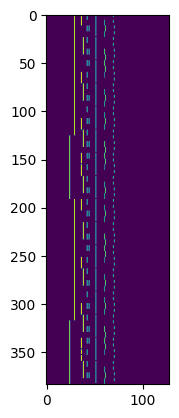

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

plt.imshow(img[0])

In [15]:
# Import dataset
import os
directory = 'BASSmidis'

filepaths = []
for filename in os.scandir(directory):
    if filename.is_file():
        filepaths.append(filename.path)
print(filepaths)

['BASSmidis\\005 - deadmau5 bass.mid', 'BASSmidis\\006 - hardwell bass.mid', 'BASSmidis\\01 c minor bass.mid', 'BASSmidis\\01 c sharp bass.mid', 'BASSmidis\\01 dms ttl1 bass.mid', 'BASSmidis\\016 - paul van dyk bass.mid', 'BASSmidis\\017 - nicky romero bass.mid', 'BASSmidis\\019 bass.mid', 'BASSmidis\\01a sub bass.mid', 'BASSmidis\\02 c major bass.mid', 'BASSmidis\\02 dms ttl1 bass.mid', 'BASSmidis\\02 f bass.mid', 'BASSmidis\\02 g bass.mid', 'BASSmidis\\024 - dada life bass.mid', 'BASSmidis\\026 - fedde le grand bass.mid', 'BASSmidis\\029 - laidback luke bass.mid', 'BASSmidis\\02b flux bass.mid', 'BASSmidis\\02b nuke em bass.mid', 'BASSmidis\\02c flux bass.mid', 'BASSmidis\\02c nuke em bass.mid', 'BASSmidis\\03 d minor bass.mid', 'BASSmidis\\03 dms ttl1 bass.mid', 'BASSmidis\\034 bass.mid', 'BASSmidis\\035 - chuckie bass.mid', 'BASSmidis\\036 - zatox bass.mid', 'BASSmidis\\037 bass.mid', 'BASSmidis\\039 - cosmic gate bass.mid', 'BASSmidis\\03b neuro funk bass.mid', 'BASSmidis\\03b sub

In [16]:
dataset = []
for path in filepaths:
    mid = mido.MidiFile(path, clip=True)
    print(path)
    imgs = mid2img(mid)
    dataset.append(imgs[0])
    dataset.append(imgs[1])
    dataset.append(imgs[2])
    dataset.append(imgs[3])  

BASSmidis\005 - deadmau5 bass.mid
BASSmidis\006 - hardwell bass.mid
BASSmidis\01 c minor bass.mid
BASSmidis\01 c sharp bass.mid
BASSmidis\01 dms ttl1 bass.mid
BASSmidis\016 - paul van dyk bass.mid
BASSmidis\017 - nicky romero bass.mid
BASSmidis\019 bass.mid
BASSmidis\01a sub bass.mid
BASSmidis\02 c major bass.mid
BASSmidis\02 dms ttl1 bass.mid
BASSmidis\02 f bass.mid
BASSmidis\02 g bass.mid
BASSmidis\024 - dada life bass.mid
BASSmidis\026 - fedde le grand bass.mid
BASSmidis\029 - laidback luke bass.mid
BASSmidis\02b flux bass.mid
BASSmidis\02b nuke em bass.mid
BASSmidis\02c flux bass.mid
BASSmidis\02c nuke em bass.mid
BASSmidis\03 d minor bass.mid
BASSmidis\03 dms ttl1 bass.mid
BASSmidis\034 bass.mid
BASSmidis\035 - chuckie bass.mid
BASSmidis\036 - zatox bass.mid
BASSmidis\037 bass.mid
BASSmidis\039 - cosmic gate bass.mid
BASSmidis\03b neuro funk bass.mid
BASSmidis\03b sub bass.mid
BASSmidis\03b yoy bass.mid
BASSmidis\03c neuro funk bass.mid
BASSmidis\03c sub bass .mid
BASSmidis\04 d m

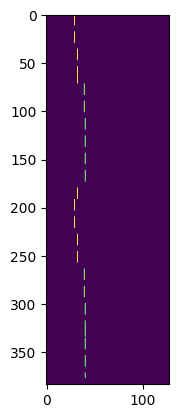

In [17]:
plt.imshow(dataset[1816])

In [18]:
print(len(dataset), len(dataset)/4)
cdataset = []

# Nagenoeg lege imgs wegfilteren
for i in range(0, len(dataset)):
    if(np.count_nonzero(dataset[i]) >= 24*2):#tenminste twee kwartnoten aan speelduur
        cdataset.append(dataset[i])
        
print(len(cdataset))
del dataset

14368 3592.0
4164


============ MUSIC DIFFUSION MODEL 1 ============

Gebaseerd op: https://tree.rocks/make-diffusion-model-from-scratch-easy-way-to-implement-quick-diffusion-model-e60d18fd0f2e

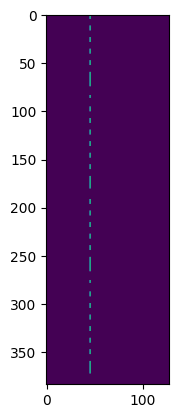

In [19]:
nsamples = len(cdataset)
X_train = np.zeros(shape=(nsamples, 384, 128, 1))

for sample in range(0, nsamples):
    for row in range(0, 384):
        for tone in range(0, 128): 
            X_train[sample][row][tone][0] = cdataset[sample][row][tone] / 63.5 - 1
            #X_train[sample][row][tone][1] = cdataset[sample][row][tone] / 63.5 - 1
            #X_train[sample][row][tone][2] = cdataset[sample][row][tone] / 63.5 - 1

del cdataset

plt.imshow(X_train[0])

#X_train = (cdataset/63.5) - 1

In [20]:
print(X_train[0])

[[[-1.]
  [-1.]
  [-1.]
  ...
  [-1.]
  [-1.]
  [-1.]]

 [[-1.]
  [-1.]
  [-1.]
  ...
  [-1.]
  [-1.]
  [-1.]]

 [[-1.]
  [-1.]
  [-1.]
  ...
  [-1.]
  [-1.]
  [-1.]]

 ...

 [[-1.]
  [-1.]
  [-1.]
  ...
  [-1.]
  [-1.]
  [-1.]]

 [[-1.]
  [-1.]
  [-1.]
  ...
  [-1.]
  [-1.]
  [-1.]]

 [[-1.]
  [-1.]
  [-1.]
  ...
  [-1.]
  [-1.]
  [-1.]]]


In [21]:
import numpy as np

from tqdm.auto import trange, tqdm
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [22]:
#IMG_SIZE = (384, 128)    # input image size
BATCH_SIZE = 4  # for training batch size
timesteps = 64    # how many steps for a noisy image into clear
time_bar = 1 - np.linspace(0, 1.0, timesteps + 1) # linspace for timesteps

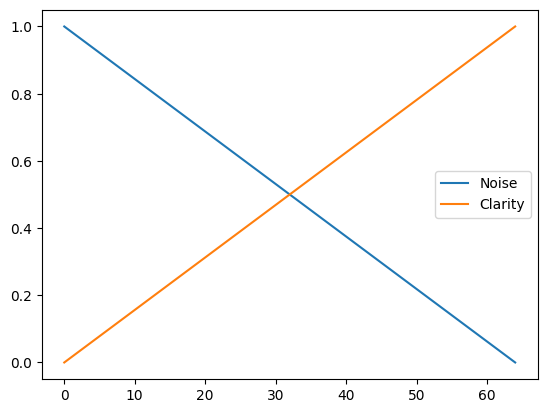

In [23]:
plt.plot(time_bar, label='Noise')
plt.plot(1 - time_bar, label='Clarity')
plt.legend()

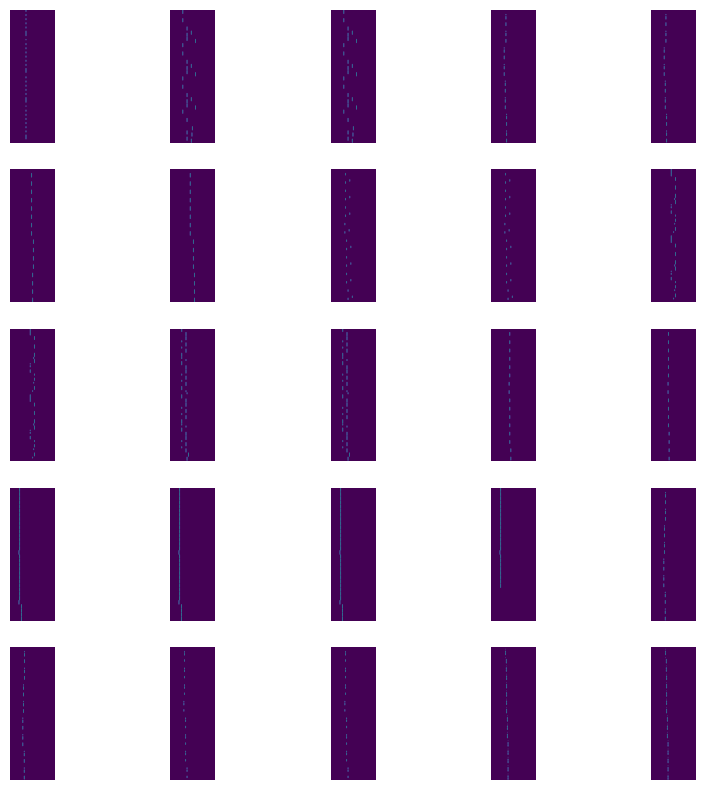

In [24]:
def cvtImg(img):
    img = img - img.min()
    img = (img / img.max())
    return img.astype(np.float32)

def show_examples(x):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        img = cvtImg(x[i])
        plt.imshow(img)
        plt.axis('off')

show_examples(X_train)

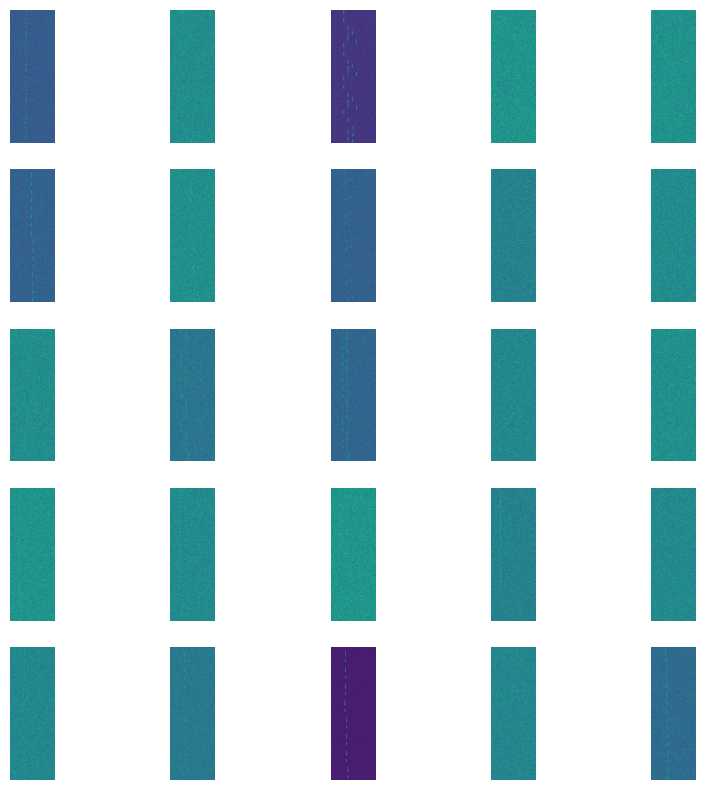

In [25]:
def forward_noise(x, t):
    a = time_bar[t]      # base on t
    b = time_bar[t + 1]  # image for t + 1
    
    noise = np.random.normal(size=x.shape)  # noise mask
    a = a.reshape((-1, 1, 1, 1))
    b = b.reshape((-1, 1, 1, 1))
    img_a = x * (1 - a) + noise * a
    img_b = x * (1 - b) + noise * b
    return img_a, img_b
    
def generate_ts(num):
    return np.random.randint(0, timesteps, size=num)

# t = np.full((25,), timesteps - 1) # if you want see clarity
# t = np.full((25,), 0)             # if you want see noisy
t = generate_ts(25)             # random for training data
a, b = forward_noise(X_train[:25], t)
show_examples(a)

In [26]:
def block(x_img, x_ts):
    x_parameter = layers.Conv2D(128, kernel_size=3, padding='same')(x_img)
    x_parameter = layers.Activation('relu')(x_parameter)

    time_parameter = layers.Dense(128)(x_ts)
    time_parameter = layers.Activation('relu')(time_parameter)
    time_parameter = layers.Reshape((1, 1, 128))(time_parameter)
    x_parameter = x_parameter * time_parameter
    
    # -----
    x_out = layers.Conv2D(128, kernel_size=3, padding='same')(x_img)
    x_out = x_out + x_parameter
    x_out = layers.LayerNormalization()(x_out)
    x_out = layers.Activation('relu')(x_out)
    
    return x_out

In [27]:
def block3(x_img, x_ts):
    x_parameter = layers.Conv2D(128, kernel_size=(4, 2), padding='same')(x_img)
    x_parameter = layers.Activation('relu')(x_parameter)

    time_parameter = layers.Dense(128)(x_ts)
    time_parameter = layers.Activation('relu')(time_parameter)
    time_parameter = layers.Reshape((1, 1, 128))(time_parameter)
    x_parameter = x_parameter * time_parameter
    
    # -----
    x_out = layers.Conv2D(128, kernel_size=(4, 2), padding='same')(x_img)
    x_out = x_out + x_parameter
    x_out = layers.LayerNormalization()(x_out)
    x_out = layers.Activation('relu')(x_out)
    
    return x_out

In [28]:
def make_model():
    x = x_input = layers.Input(shape=(384, 128, 1), name='x_input')
    
    x_ts = x_ts_input = layers.Input(shape=(1,), name='x_ts_input')
    x_ts = layers.Dense(192*4*4)(x_ts)
    x_ts = layers.LayerNormalization()(x_ts)
    x_ts = layers.Activation('relu')(x_ts)
    
    # ----- left ( down ) -----
    x = x384 = block3(x, x_ts)
    x = layers.MaxPool2D((3, 1))(x)
    
    x = x128 = block(x, x_ts)
    x = layers.MaxPool2D(2)(x)
    
    x = x64 = block(x, x_ts)
    x = layers.MaxPool2D(2)(x)
    
    x = x32 = block(x, x_ts)
    x = layers.MaxPool2D(2)(x)
    
    x = x16 = block(x, x_ts)
    x = layers.MaxPool2D(2)(x)
    
    x = x8 = block(x, x_ts)
    x = layers.MaxPool2D(2)(x)
    
    x = x4 = block(x, x_ts)
    
    # ----- MLP -----
    x = layers.Flatten()(x)
    x = layers.Concatenate()([x, x_ts])
    x = layers.Dense(128*4)(x)
    x = layers.LayerNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Dense(4 * 4 * 128)(x)
    x = layers.LayerNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Reshape((4, 4, 32*4))(x)
    
    # ----- right ( up ) -----
    x = layers.Concatenate()([x, x4])
    x = block(x, x_ts)
    x = layers.UpSampling2D(2)(x)
    
    x = layers.Concatenate()([x, x8])
    x = block(x, x_ts)
    x = layers.UpSampling2D(2)(x)
    
    x = layers.Concatenate()([x, x16])
    x = block(x, x_ts)
    x = layers.UpSampling2D(2)(x)
    
    x = layers.Concatenate()([x, x32])
    x = block(x, x_ts)
    x = layers.UpSampling2D(2)(x)

    x = layers.Concatenate()([x, x64])
    x = block(x, x_ts)
    x = layers.UpSampling2D(2)(x)

    x = layers.Concatenate()([x, x128])
    x = block(x, x_ts)
    x = layers.UpSampling2D((3,1))(x)

    x = layers.Concatenate()([x, x384])
    x = block(x, x_ts)
    
    # ----- output -----
    x = layers.Conv2D(1, kernel_size=1, padding='same')(x)
    model = tf.keras.models.Model([x_input, x_ts_input], x)
    return model

model = make_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x_ts_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 3072)         6144        ['x_ts_input[0][0]']             
                                                                                                  
 layer_normalization (LayerNorm  (None, 3072)        6144        ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 3072)         0           ['layer_normalization[0][0]']

In [29]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0008)
loss_func = tf.keras.losses.MeanAbsoluteError()
model.compile(loss=loss_func, optimizer=optimizer)

  0%|          | 0/64 [00:00<?, ?it/s]

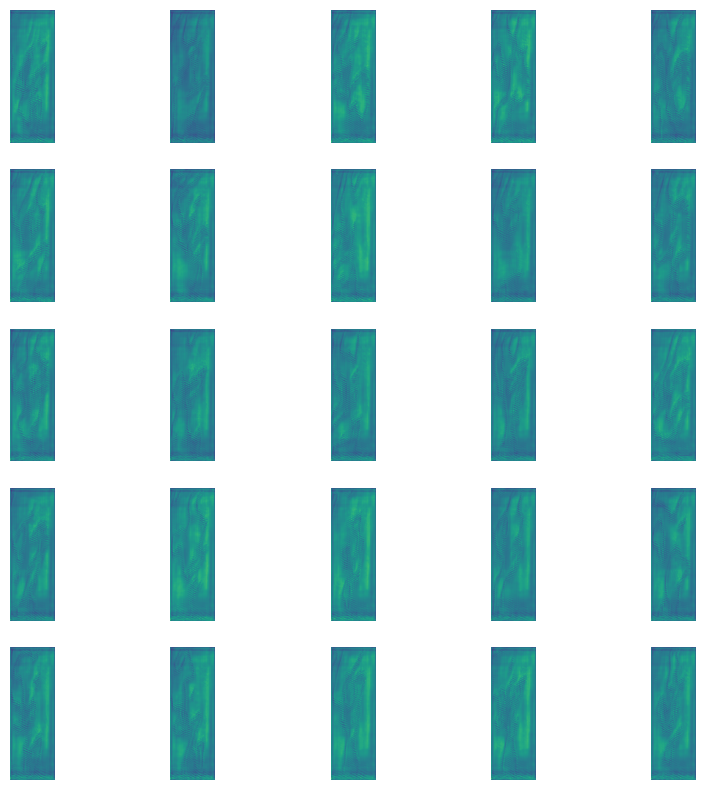

In [30]:
def predict(x_idx=None):
    x = np.random.normal(size=(32, 384, 128, 1))
    for i in trange(timesteps):
        t = i
        x = model.predict([x, np.full((32), t)], verbose=0)
    show_examples(x)

predict()

  0%|          | 0/64 [00:00<?, ?it/s]

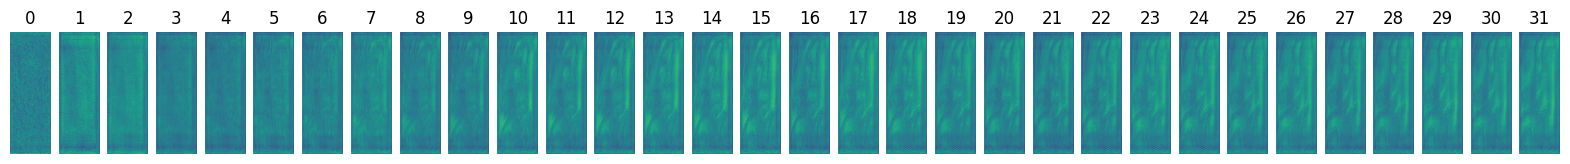

In [31]:
def predict_step():
    xs = []
    x = np.random.normal(size=(8, 384, 128, 1))

    for i in trange(timesteps):
        t = i
        x = model.predict([x, np.full((8),  t)], verbose=0)
        if i % 2 == 0:
            xs.append(x[0])

    plt.figure(figsize=(20, 2))
    for i in range(len(xs)):
        plt.subplot(1, len(xs), i+1)
        plt.imshow(cvtImg(xs[i]))
        plt.title(f'{i}')
        plt.axis('off')

predict_step()

In [32]:
def train_one(x_img):
    x_ts = generate_ts(len(x_img))
    x_a, x_b = forward_noise(x_img, x_ts)
    loss = model.train_on_batch([x_a, x_ts], x_b)
    return loss

In [33]:
def train(R=10):
    bar = trange(R)
    total = 100
    for i in bar:
        for j in range(total):
            x_img = X_train[np.random.randint(len(X_train), size=BATCH_SIZE)]
            loss = train_one(x_img)
            pg = (j / total) * 100
            if j % 5 == 0:
                bar.set_description(f'loss: {loss:.5f}, p: {pg:.2f}%')

In [34]:
#model = tf.keras.models.load_model('MusicDiffusionRX580_x16+block3+MLPx2_s32_b4_c3.keras')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

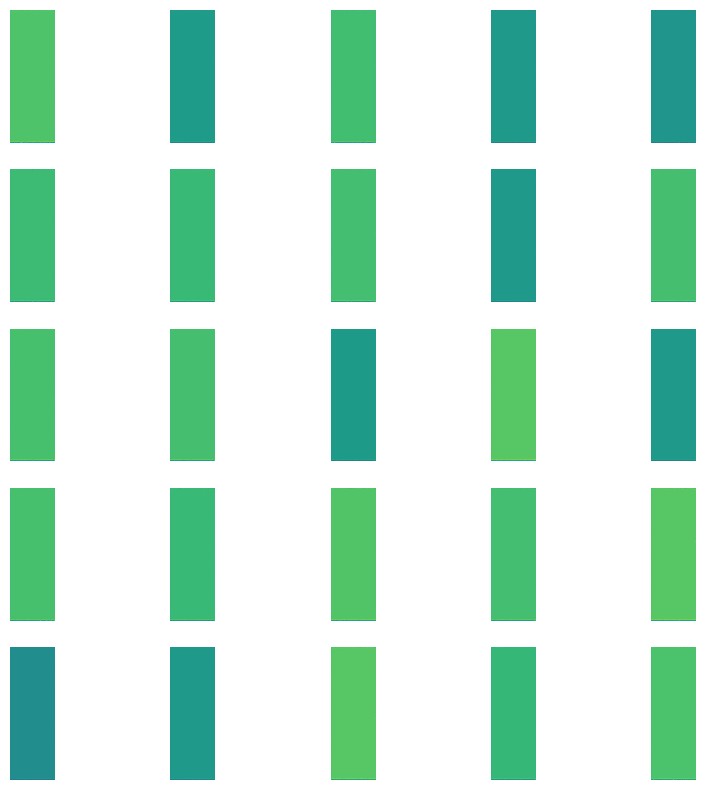

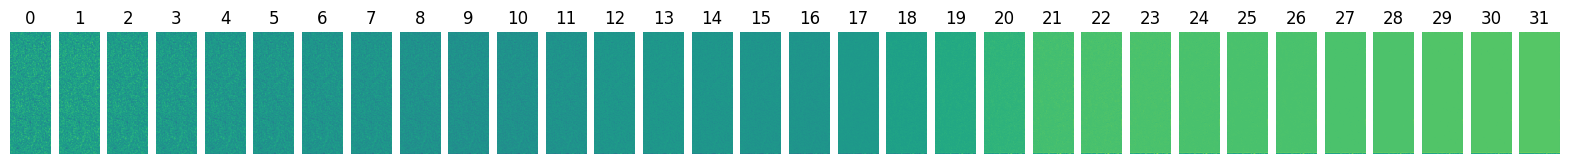

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

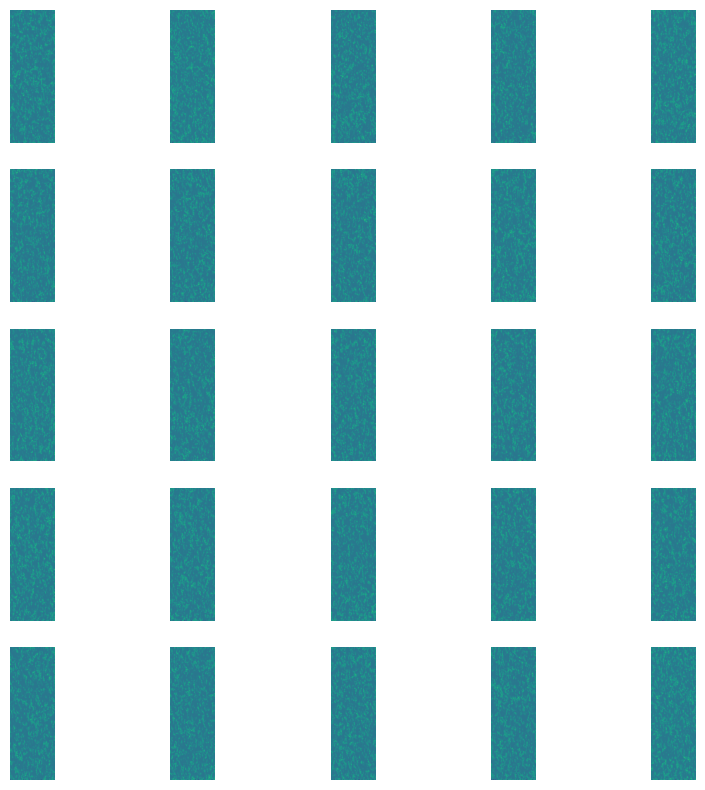

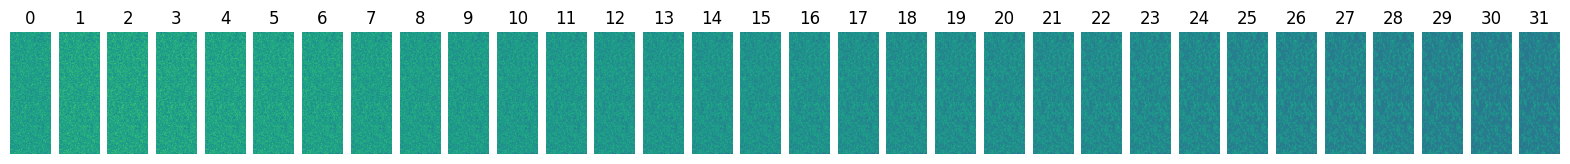

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

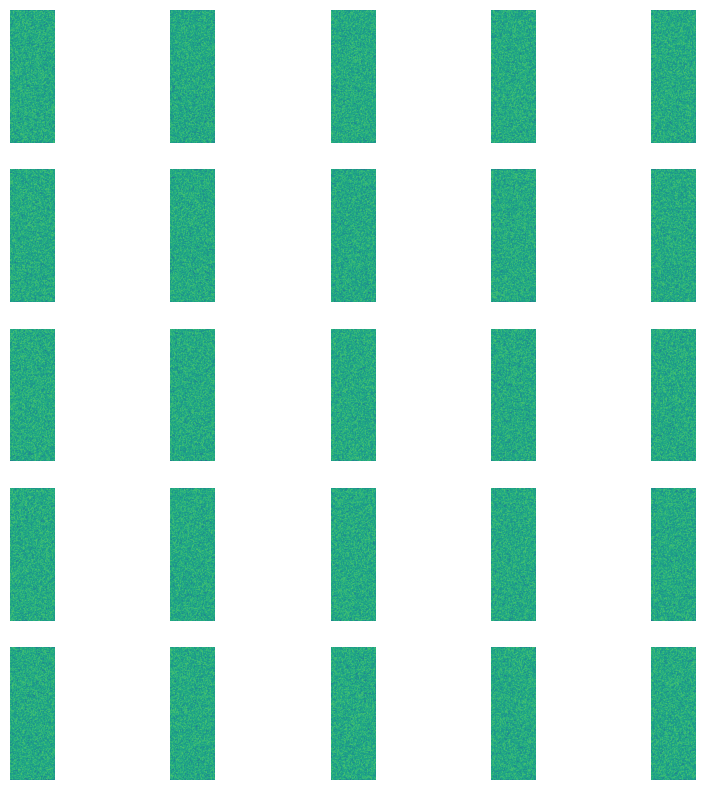

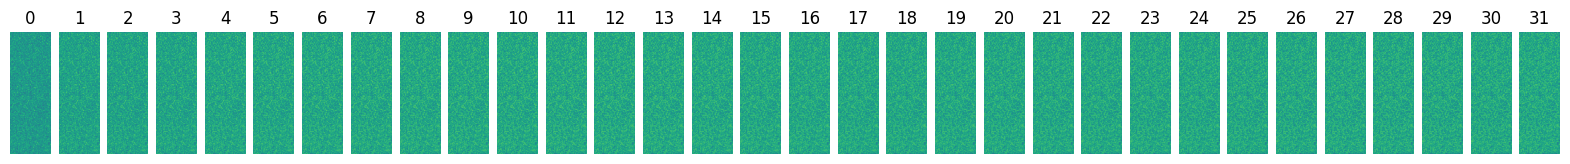

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

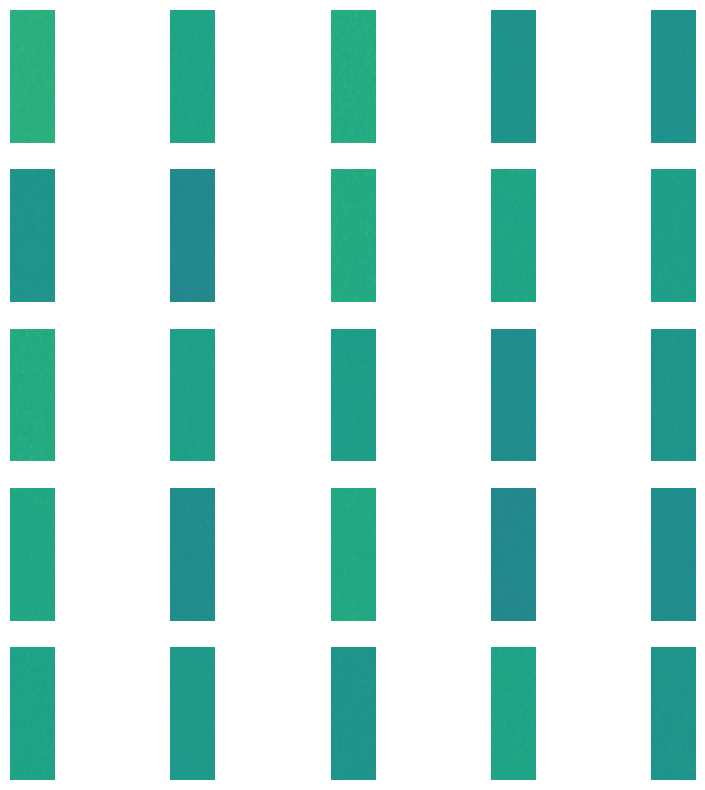

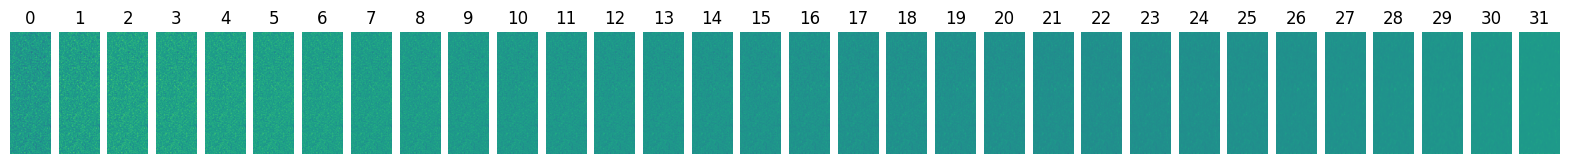

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

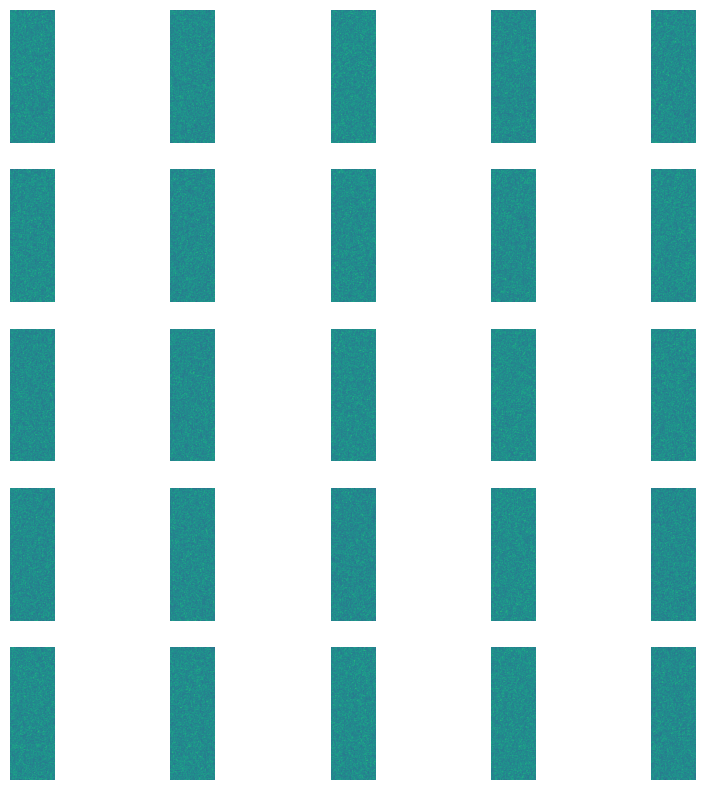

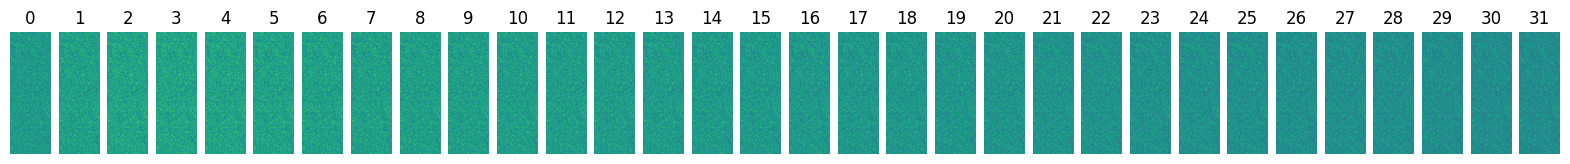

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

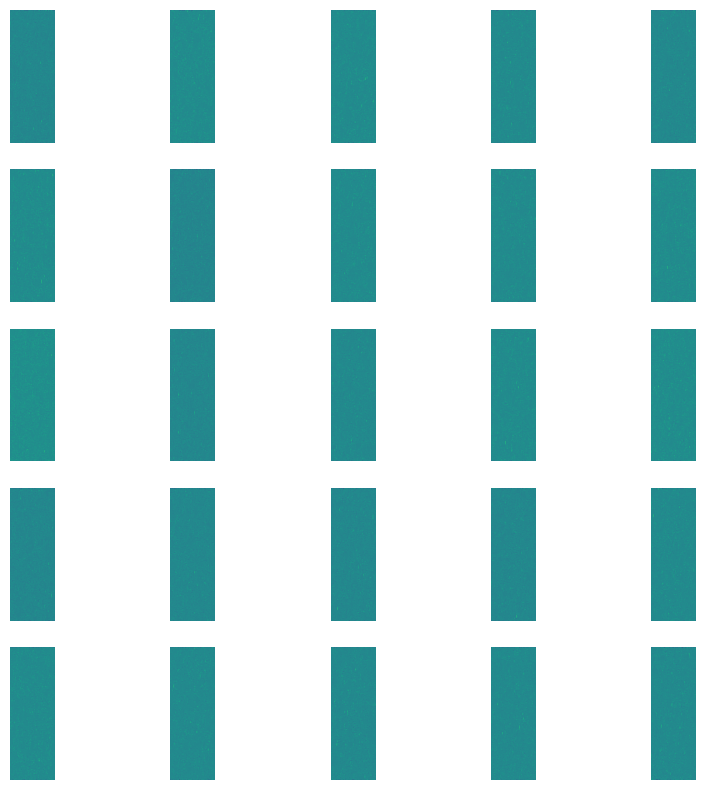

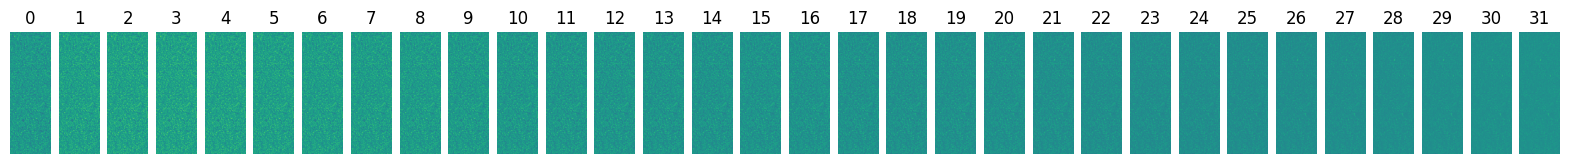

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

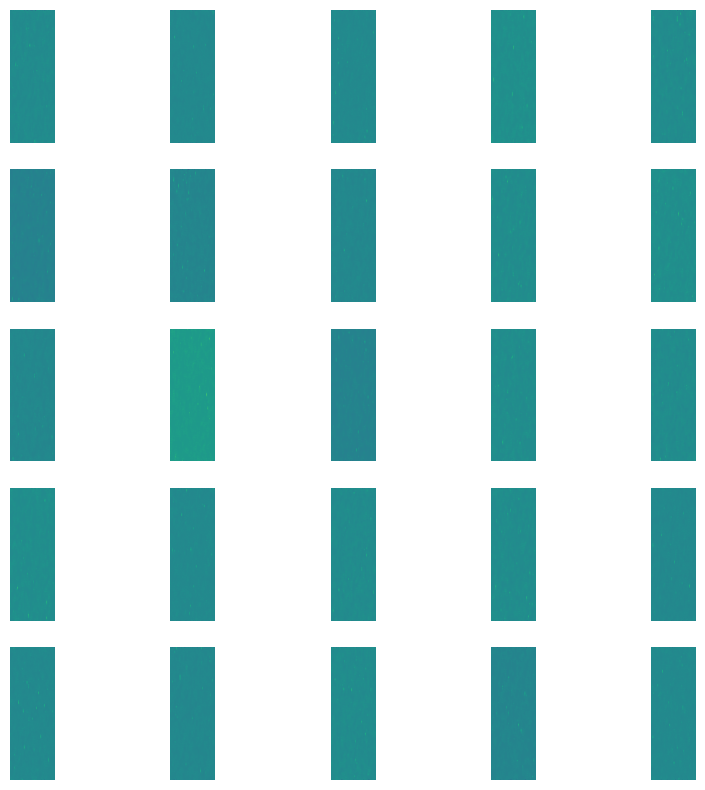

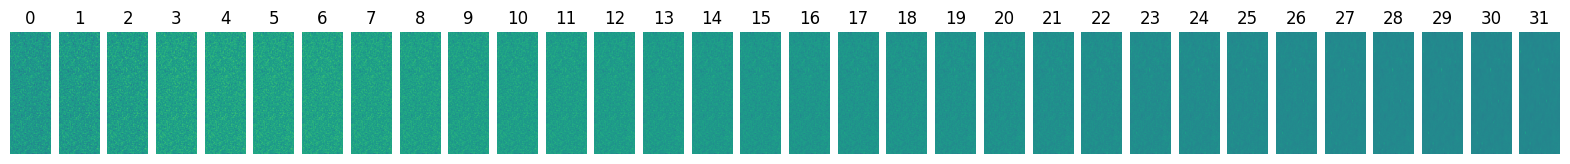

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

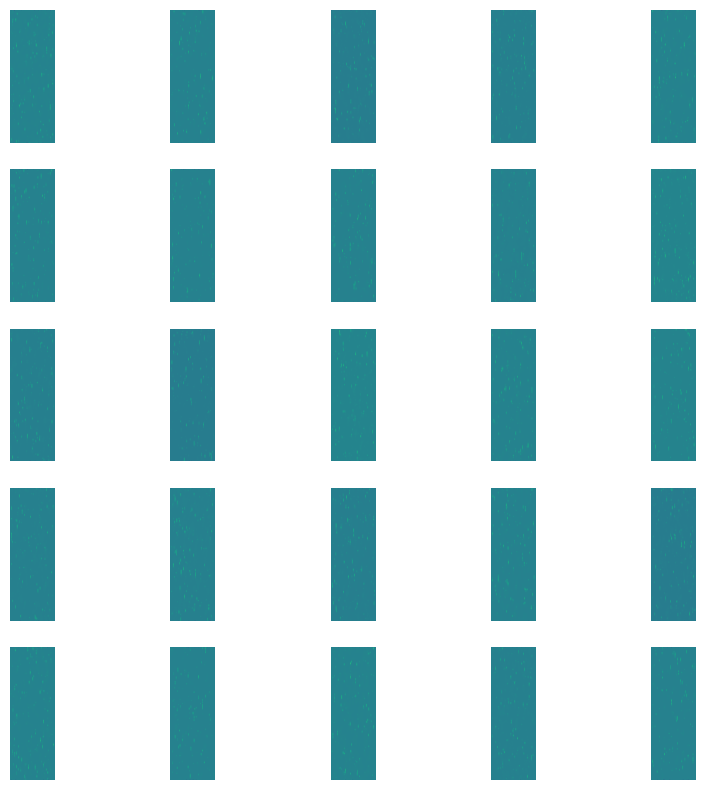

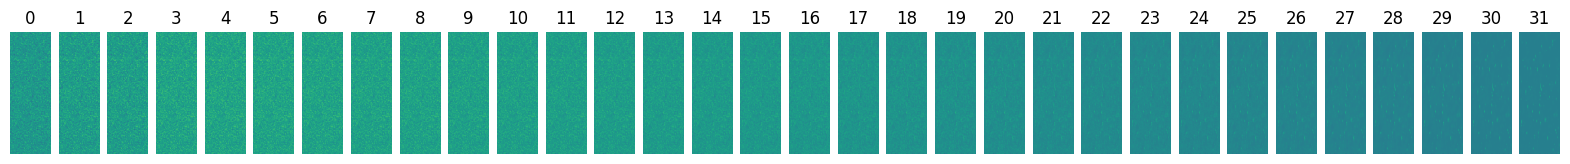

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

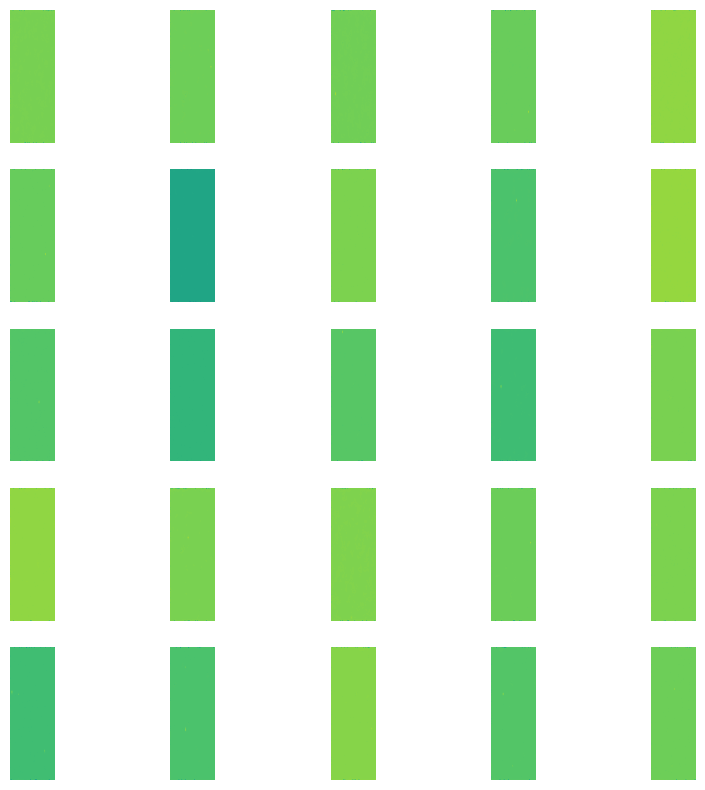

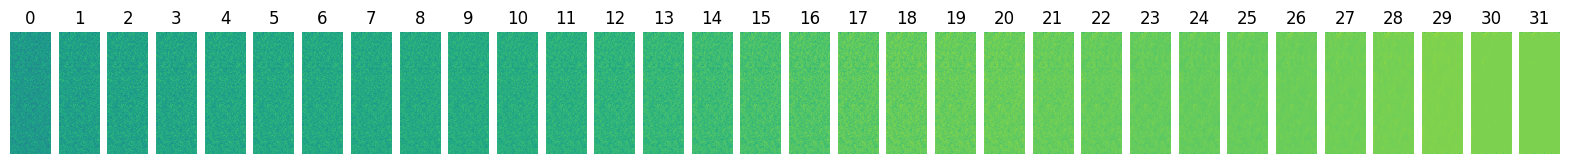

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

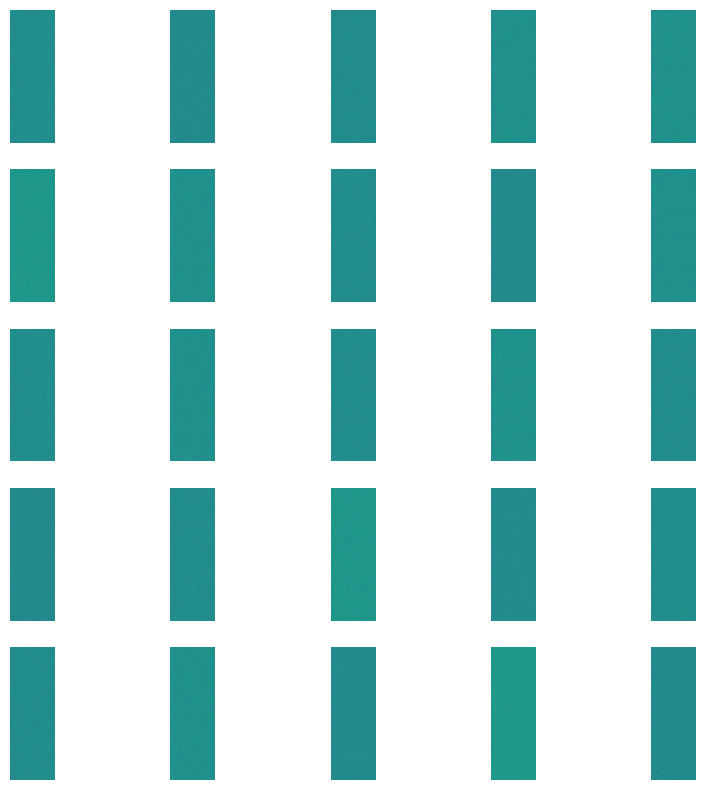

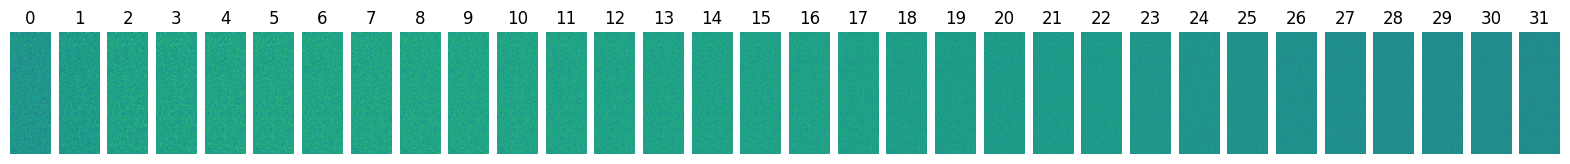

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

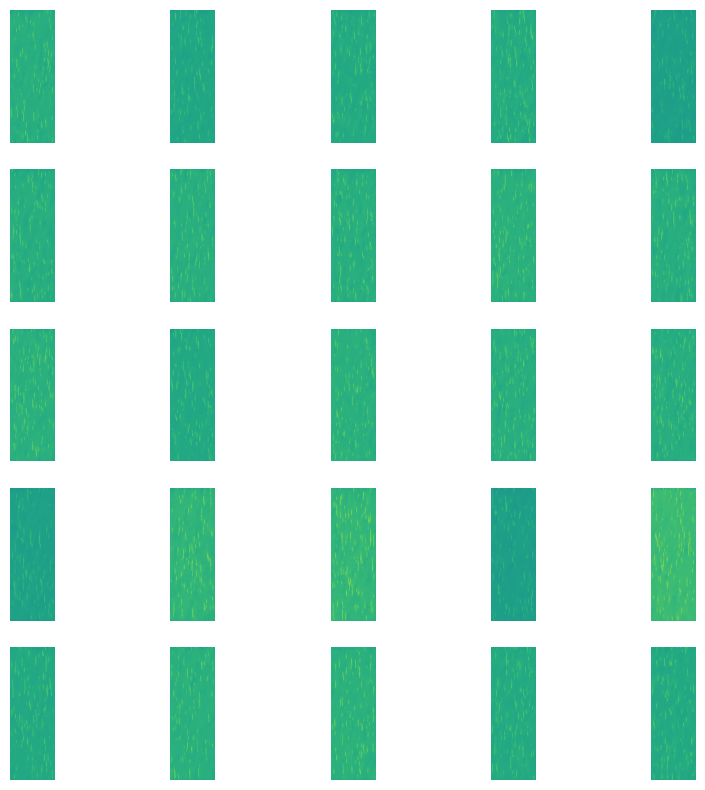

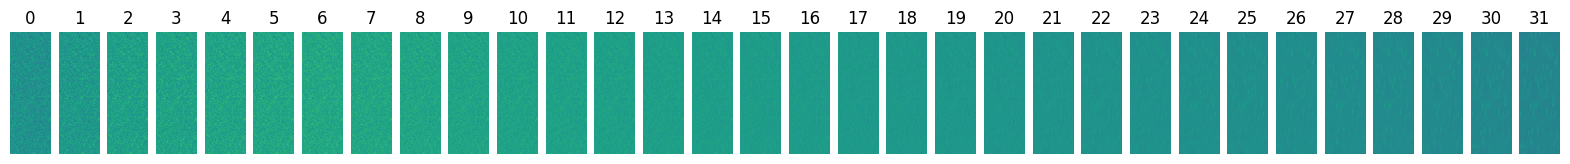

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

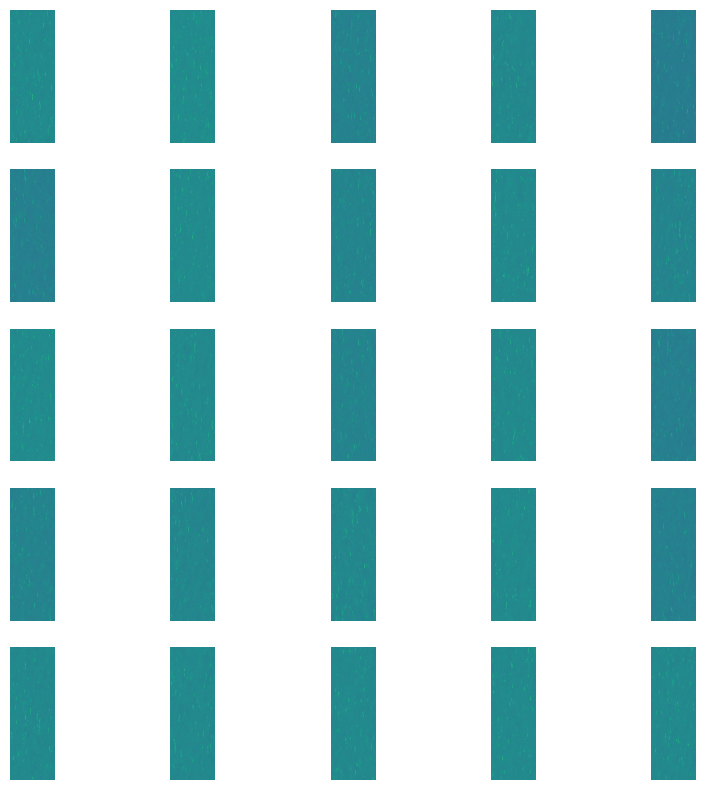

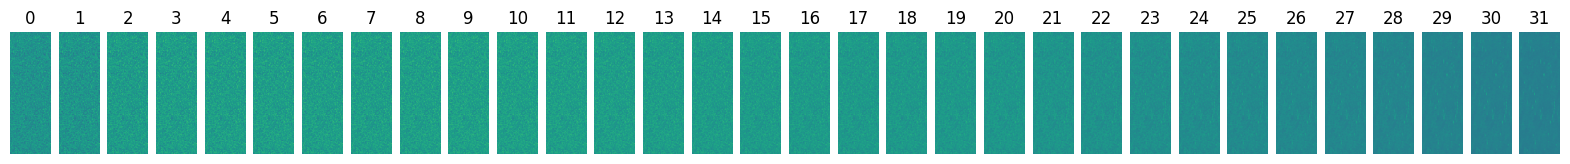

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
for cycle in range(50):
    train()
    # reduce learning rate for next training
    model.optimizer.learning_rate = max(0.00000001, model.optimizer.learning_rate * 0.954)
    model.save(f'MusicDiffusionRX580_x16+block3+MLPx4_s64_b4_c{cycle}.keras')

    # show result 
    predict()
    predict_step()
    plt.show()

In [ ]:
#model.save('MusicDiffusionRX580_x16+block3_SGD_c0.keras')

In [ ]:
model = tf.keras.models.load_model('MusicDiffusionRX580_x16+block3_c11_c6SGD-momentum(lr03_12)e6b4.keras')

In [ ]:
model.load_weights('MusicDiffusionRX580_x16+block3_c17_c6SGD-momentum(lr04_8)e6-11lrx_11.keras')

In [ ]:
predict()

In [ ]:
model = tf.keras.models.load_model('MusicDiffusionRX580_x16+block3_c10_c6SGD-momentum(lr04_8)e6.keras')
print('10')
#predict()

In [ ]:
model = tf.keras.models.load_model('MusicDiffusionRX580_x16+block3_c11_c6SGD-momentum(lr04_8)e6.keras')
print('11')
#predict()

In [ ]:
model = tf.keras.models.load_model('MusicDiffusionRX580_x16+block3_c12_c6SGD-momentum(lr04_8)e6.keras')
print('12')
predict()

In [ ]:
model = tf.keras.models.load_model('MusicDiffusionRX580_x16+block3_c17_c6SGD-momentum(lr04_8)e6-11lrx_11.keras')

In [ ]:
print(model.optimizer.learning_rate)

In [ ]:
model.optimizer.learning_rate = 2.7615322e-06
#model.optimizer.momentum = 0.16

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00032)

- = = = = = = GENEREER MIDI'S = = = = = = -

In [ ]:
def generate(reqsize, x_idx=None):
    x = np.random.normal(size=(reqsize, 384, 128, 1))
    for i in trange(timesteps):
        t = i
        x = model.predict([x, np.full((reqsize), t)], verbose=0)
    return(x)

# Normaliseer naar velocity range van MIDI en filter slechte outputs
def midimgs(imgs):
    out = []
    imgcount = len(imgs)
    for img in range(imgcount):
        imgs[img] = imgs[img] - np.min(imgs[img])
        imgs[img] = imgs[img] / np.max(imgs[img])
        imgs[img] = imgs[img] * 127

        # Weinig ruis (veel noten) en minimaal twee kwartnoten speelduur
        if(((imgs[img] >= 16).sum() < 384 * 12) and ((imgs[img] >= 16).sum() > 24*2)):
            out.append(imgs[img])
    return(out)

# img2mid met kleine aanpassing aan de shape van generator in- en output
def AI2mid(img):
    mid = mido.MidiFile()
    track = mido.MidiTrack()
    mid.tracks.append(track)
    tpb = 480
    tpr = int(round(tpb/24)) #ticks per row (20)
    mid.ticks_per_beat = tpb
    t = 0

    row = 0
    nrows = len(img)

    # track.append(mido.MetaMessage('set_tempo', tempo=500000, time=0)) # niet nodig, default bpm=120 (500000 microseconden per beat)
    
    # Eerste row
    for tone in range(0,128):
        if(img[row][tone][0] >= 32):
            # velocity van volgende rows wordt gebruikt om effect blur te verminderen (fade-in volume)
            track.append(mido.Message('note_on', channel=0, note=int(tone), velocity=max(int(round(img[row][tone][0])), int(round(img[row+1][tone][0])), int(round(img[row+2][tone][0]))), time=0))
    row += 1
    t += tpr

    # t/m twee na laatste row
    while(row < nrows-2):
        for tone in range(0,128):
            if((img[row][tone][0] < 32) and (img[row-1][tone][0] >= 32)):
                track.append(mido.Message('note_off', channel=0, note=int(tone), velocity=96, time=t))
                t = 0
            if((img[row][tone][0] >= 32) and (img[row-1][tone][0] < 32)):
                track.append(mido.Message('note_on', channel=0, note=int(tone), velocity=max(int(round(img[row][tone][0])), int(round(img[row+1][tone][0])), int(round(img[row+2][tone][0]))), time=t))
                t = 0
        row += 1
        t += tpr

    # Één na laatste row
    for tone in range(0,128):
        if((img[row][tone][0] < 32) and (img[row-1][tone][0] >= 32)):
            track.append(mido.Message('note_off', channel=0, note=int(tone), velocity=96, time=t))
            t = 0
        if((img[row][tone][0] >= 32) and (img[row-1][tone][0] < 32)):
            track.append(mido.Message('note_on', channel=0, note=int(tone), velocity=max(int(round(img[row][tone][0])), int(round(img[row+1][tone][0]))), time=t))
            t = 0
    row += 1
    t += tpr

    # Laatste row
    for tone in range(0,128):
        if((img[row][tone][0] < 32) and (img[row-1][tone][0] >= 32)):
            track.append(mido.Message('note_off', channel=0, note=int(tone), velocity=96, time=t))
    # Noten die op de laatste rij nog aan staan worden niet uitgezet en lopen denkbeeldig door naar de volgende image

    track.append(mido.MetaMessage('end_of_track'))

    return(mid)   

In [ ]:
#model = tf.keras.models.load_model('MusicDiffusionRX580_x16+block3_c10_c6SGD-momentum(lr04_8)e6.keras')
#model = tf.keras.models.load_model('MusicDiffusionRX580_x16+block3_c11_c6SGD-momentum(lr04_8)e6.keras')
#model = tf.keras.models.load_model('MusicDiffusionRX580_x16+block3_c12_c6SGD-momentum(lr04_8)e6.keras')
model = tf.keras.models.load_model('MusicDiffusionRX580_x16+block3_c10_c6SGD-momentum(lr03_12)e6b4.keras')

In [ ]:
generatedimgs = midimgs(generate(32))
imgcount = len(generatedimgs)
for piece in range(imgcount):
    plt.imshow(generatedimgs[piece])
    plt.title(f'{piece}')
    plt.show()
    mid = AI2mid(generatedimgs[piece])
    mid.save(f'MusDiff{piece}.mid')

In [ ]:
for piece in range(imgcount):
    plt.imshow(generatedimgs[piece])
    plt.title(f'{piece}')
    plt.show()
    mid = AI2mid(generatedimgs[piece])
    mid.save(f'MusDiff{piece}.mid')